# Species Overlap

This notebook generates venn diagrams to examine overlap of species for different methods. We also detemine the species more often heard than seen in MKNP.



In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib_venn import venn2, venn3

In [2]:
pfiles = os.listdir('../annotations/')

In [3]:
def species_from_df(df):
    '''
    This function extracts species from the audio annotation files
    '''
    sps = []
    for i in range(len(df)):
        if not pd.isna(df.iloc[i]['Foreground Species']):
            sps += df.iloc[i]['Foreground Species'].split(';')
        if not pd.isna(df.iloc[i]['Background Species']):
            sps += df.iloc[i]['Background Species'].split(';')
    return list(set(sps))


In [4]:
# scientific names
df_sp = pd.read_csv('../annotations/Kenya-Species-List.csv')
# common name
kenyan_sp_cn = list(df_sp['Common Name'])
# scientific name
kenyan_sp_sn = list(df_sp['Scientific Name'])

## DeKUWC

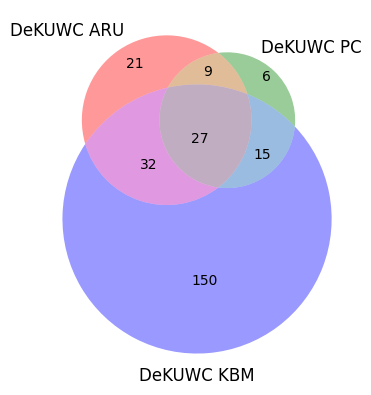

In [5]:
# PC
dekuwc_pc = pd.read_csv('../annotations/dekuwc-pc-2017.csv')
dekuwc_pc_species = list(dekuwc_pc['Unnamed: 0'])

#KBM
dekuwc_kbm = pd.read_csv('../annotations/dekuwc-kbm.csv')
dekuwc_kbm_species = list(dekuwc_kbm['Unnamed: 0'])

# ARU
dekuwc_aru_species = []
for pfile in pfiles:
    if 'pc' not in pfile and 'kbm' not in pfile and 'dekuwc' in pfile and pfile.endswith('csv'):
        df = pd.read_csv(os.path.join('../annotations', pfile))
        dekuwc_aru_species += species_from_df(df)

dekuwc_aru_species = list(set(dekuwc_aru_species))

venn3((set(dekuwc_aru_species), set(dekuwc_pc_species), set(dekuwc_kbm_species)), 
      set_labels = ('DeKUWC ARU', 'DeKUWC PC', 'DeKUWC KBM'))
plt.savefig('venn-dekut-all.jpg', dpi=300)

## MKNP

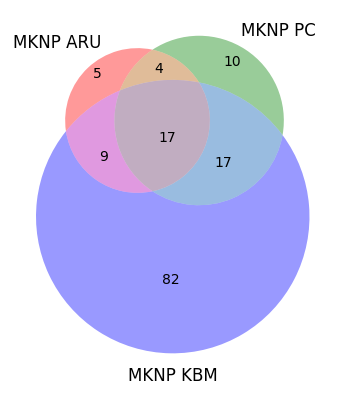

In [6]:
# MKNP PC Data
mknp_pc = pd.read_csv('../annotations/mknp-pc-2017-2018.csv')
mknp_pc_species = list(mknp_pc['Unnamed: 0'])

# MKNP KBM Data
mknp_kbm = pd.read_csv('../annotations/mknp-kbm.csv')
mknp_kbm_species = list(mknp_kbm['Unnamed: 0'])

# MKNP ARU Data
mknp_aru = pd.read_csv('../annotations/mknp-aru-2017-2018.csv')
mknp_aru_species = species_from_df(mknp_aru)


venn3((set(mknp_aru_species), set(mknp_pc_species), set(mknp_kbm_species)), 
      set_labels = ('MKNP ARU', 'MKNP PC', 'MKNP KBM'))
plt.savefig('venn-mknp-all.jpg', dpi=300)

# Detecting Vocal Species

In [7]:
cues = pd.read_csv('../annotations/MKNP-PC-Cues.csv')

In [8]:
cues

,Unnamed: 0,Date,Point Count,Common Name,Scientific Name,Cues (H=head/s= seen)
0,0,2017-11-18,1,Brown Woodland Warbler,Phylloscopus umbrovirens,H
1,1,2017-11-18,1,Brown Woodland Warbler,Phylloscopus umbrovirens,H
2,2,2017-11-18,1,Chin-spot Batis,Batis molitor,H
3,3,2017-11-18,1,Chestnut-throated Apalis,Apalis porphyrolaema,H
4,4,2017-11-18,1,Brown Woodland Warbler,Phylloscopus umbrovirens,H
...,...,...,...,...,...,...
251,131,2018-06-17,10,Mountain Yellow Warbler,Chloropeta similis,H
252,132,2018-06-17,10,Chestnut-throated Apalis,Apalis porphyrolaema,H
253,133,2018-06-17,10,Yellow-crowned Canary,Serinus flavivertex,H
254,134,2018-06-17,10,Montane White-eye,Zosterops poliogastrus,H


In [9]:
mk_heard_pc = []
all_pct = []
num_obs = []
for sp in mknp_pc_species:
    df = cues[cues['Common Name']==sp]

    if len(df):
        pct = sum(df['Cues (H=head/s= seen)'] == 'H') / len(df)
        if pct >= .5:
            print(sp, len(df), pct)
            mk_heard_pc.append(sp)
            all_pct.append(pct)
            num_obs.append(len(df))

African Dusky Flycatcher 3 1.0
African Goshawk 1 1.0
African Hill Babbler 3 0.6666666666666666
Brown Woodland Warbler 50 0.94
Chestnut-throated Apalis 34 0.9705882352941176
Chin-spot Batis 1 1.0
Cinnamon Bracken Warbler 38 0.9473684210526315
Common Bulbul 1 1.0
Crowned Eagle 6 1.0
Eastern Double-collared Sunbird 1 1.0
Grey Apalis 1 1.0
Grey Cuckooshrike 1 1.0
Hartlaub's Turaco 13 0.9230769230769231
Montane White-eye 25 0.84
Mountain Greenbul 3 0.6666666666666666
Mountain Yellow Warbler 11 0.9090909090909091
Olive Sunbird 8 0.5
Red-fronted Parrot 15 0.6
Variable Sunbird 1 1.0
White-bellied Tit 4 0.75
White-headed Wood-hoopoe 3 0.6666666666666666
White-starred Robin 21 0.8571428571428571
Yellow-crowned Canary 1 1.0


## Figure 4

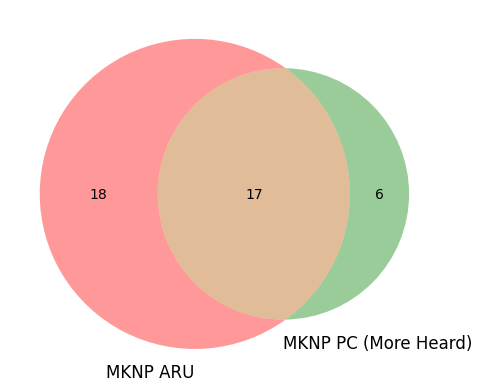

In [10]:
venn2((set(mknp_aru_species), set(mk_heard_pc)), 
      set_labels = ('MKNP ARU', 'MKNP PC (More Heard)'))
plt.savefig('venn-mknp-more-heard.jpg', dpi=300)

In [11]:
set(mk_heard_pc) - set(mknp_aru_species) 

{'African Hill Babbler',
 'Chin-spot Batis',
 'Grey Cuckooshrike',
 'Variable Sunbird',
 'White-bellied Tit',
 'Yellow-crowned Canary'}

In [12]:
mk_heard_pc_sn = [kenyan_sp_sn[kenyan_sp_cn.index(sp)] for indx, sp in enumerate(mk_heard_pc)]

## Table 5

In [13]:
mknp_df = pd.DataFrame(zip(mk_heard_pc_sn, mk_heard_pc, num_obs, all_pct), columns=['Scientific Name','Common Name', '\# Obs', 'Fraction Heard'])
mknp_df = mknp_df.sort_values(by=['\# Obs'], ascending=False)
#print(mknp_df.to_latex(index=False,
#                  formatters={"name": str.upper},
#                  float_format="{:.2f}".format,
#))
mknp_df

,Scientific Name,Common Name,\# Obs,Fraction Heard
3,Phylloscopus umbrovirens,Brown Woodland Warbler,50,0.940000
6,Bradypterus cinnamomeus,Cinnamon Bracken Warbler,38,0.947368
4,Apalis porphyrolaema,Chestnut-throated Apalis,34,0.970588
13,Zosterops poliogastrus,Montane White-eye,25,0.840000
21,Pogonocichla stellata,White-starred Robin,21,0.857143
17,Poicephalus gulielmi,Red-fronted Parrot,15,0.600000
12,Tauraco hartlaubi,Hartlaub's Turaco,13,0.923077
15,Chloropeta similis,Mountain Yellow Warbler,11,0.909091
16,Cyanomitra olivacea,Olive Sunbird,8,0.500000
8,Stephanoaetus coronatus,Crowned Eagle,6,1.000000
